### Foma Mironenko, <br>SPbU, Faculty of Mathematics and Mechanics,<br>431

# CNN, *Part II*

### In this notebook we import custom digits and a cnn model from files and check out the prediction results.

In [1]:
#----- data handling -----#
import pandas as pd
import numpy as np
from os import listdir

In [2]:
#----- conv net -----#
from tensorflow import keras

In [3]:
#----- images -----#
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

## Load pictures

In [4]:
IMG_DIR = './pictures/';
R = 28;
C = 28;
IMG_MODE = 'L'; #greyscale 256 image

#### Load images, convert to greyscale and resize to 28x28

In [5]:
img_list = [ 
    Image.open(IMG_DIR + name)
    .convert(IMG_MODE)
    .resize((R, C), Image.BILINEAR)
for name in
    filter(lambda f: f.endswith('.png'), listdir(IMG_DIR))
];

## Apply the trained model

In [6]:
model = keras.models.load_model('./trained-model');

In [7]:
X = np.array([255 - np.array(img) for img in img_list]);
Y = np.argmax(
    model.predict(X),
    axis=1 
);

## Draw results

In [8]:
digits = []
for i in range(10):
    img = Image.new('L', (R, C))
    draw = ImageDraw.Draw(img)
    draw.text((12, 8), str(i), fill=255)
    digits.append(img)

full_img = Image.new(IMG_MODE, (C*len(img_list), 2*R));
for i in range(0, len(img_list)):
    full_img.paste(img_list[i], (i*C, 0))
    full_img.paste(digits[Y[i]], (i*C, R))

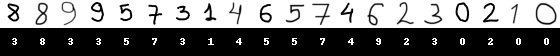

In [9]:
full_img